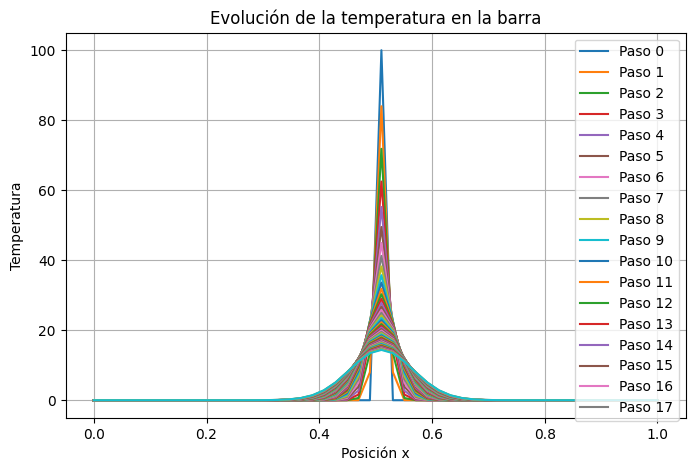

In [1]:
# graficar_difusion.ipynb

import matplotlib.pyplot as plt
import numpy as np
import re
 
# Ruta al archivo de resultados
ruta_archivo = "../datos/resultados.txt"

# Leer todo el contenido
with open(ruta_archivo, "r") as f:
    contenido = f.read()

# Dividir por pasos usando la línea de separación
bloques = contenido.strip().split("-------------------------\n")

pasos = []
for bloque in bloques:
    lineas = bloque.strip().split("\n")
    if len(lineas) < 3:
        continue
    # Extraer número de paso
    paso_match = re.match(r"Paso (\d+):", lineas[0])
    if paso_match:
        paso = int(paso_match.group(1))
    else:
        continue

    # Extraer datos x y temperatura
    x_vals = []
    temp_vals = []
    for linea in lineas[2:]:  # Saltar encabezado
        try:
            x, t = map(float, linea.split())
            x_vals.append(x)
            temp_vals.append(t)
        except:
            pass
    
    pasos.append((paso, np.array(x_vals), np.array(temp_vals)))

# Graficar todos los pasos, convertimos cada paso en evolución temporal 
plt.figure(figsize=(8,5))

for paso, x, temp in pasos:
    if paso <= 17:   # Hasta el paso 17 mostramos la etiqueta
        plt.plot(x, temp, label=f"Paso {paso}")
    else:            # Después de 17 seguimos graficando, pero sin etiqueta
        plt.plot(x, temp, label="_nolegend_")    

plt.xlabel("Posición x")
plt.ylabel("Temperatura")
plt.title("Evolución de la temperatura en la barra")
plt.legend()
plt.grid(True)
plt.show()


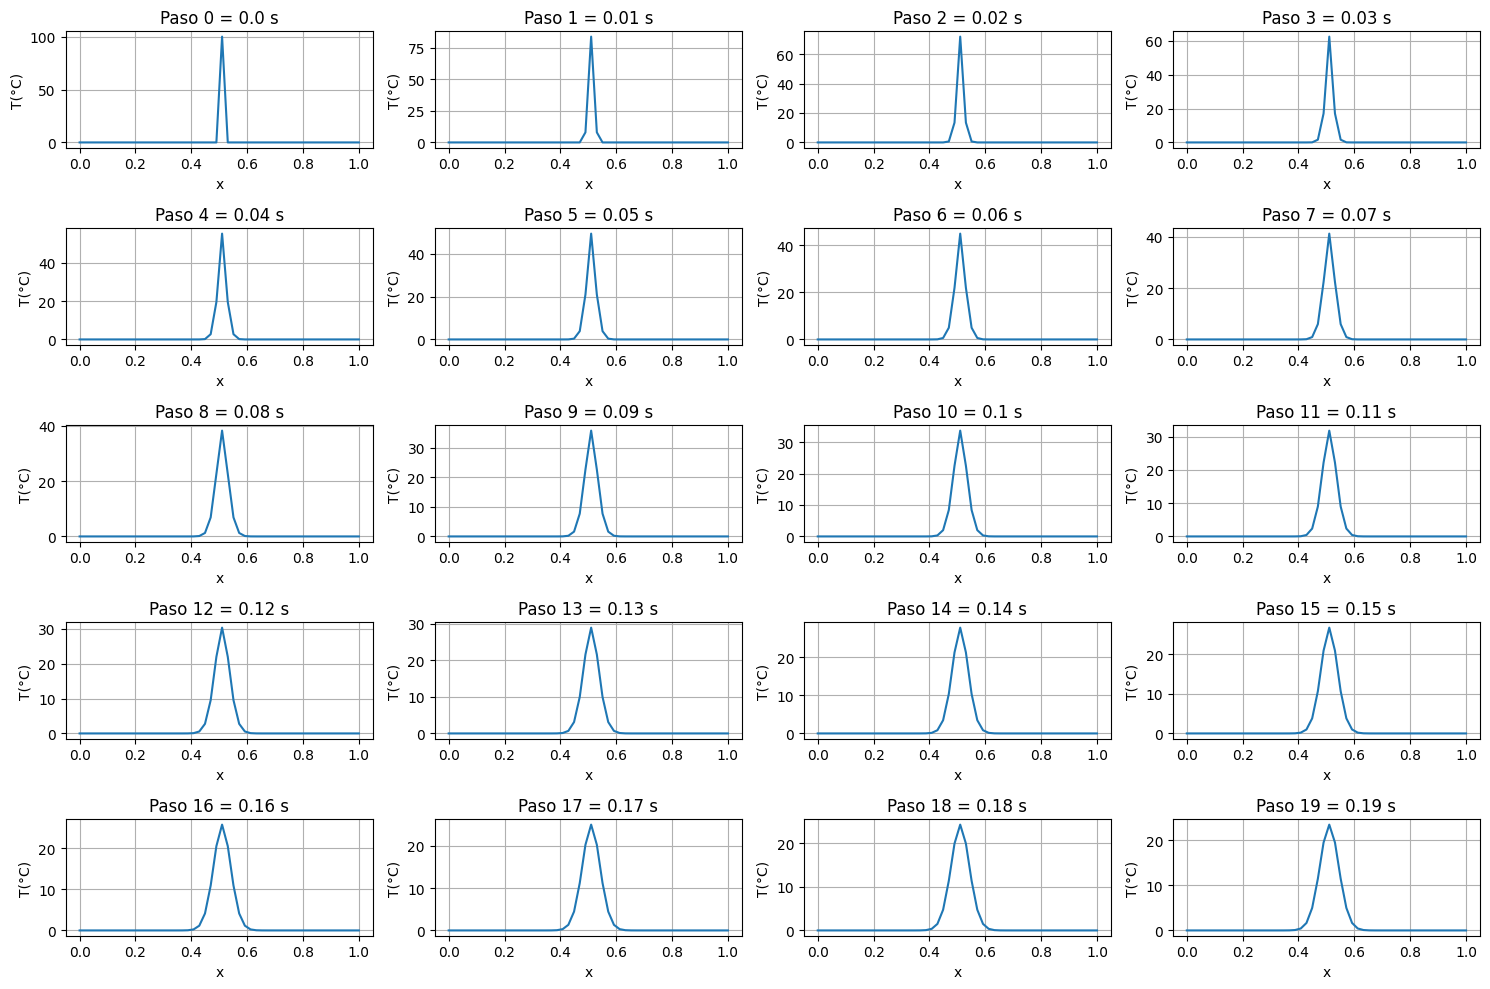

In [2]:
# Gráfico de cada temperatura por pasos
fig, axes = plt.subplots(5, 4, figsize=(15, 10))
axes = axes.flatten()  # convertir a lista para iterar fácilmente

dt = 0.01
for i, (paso, x, temp) in enumerate(pasos[:20]):           # Sólo loa primeros 20 pasos
    axes[i].plot(x, temp)
    axes[i].set_title(f"Paso {paso} = {paso*dt} s")
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("T(°C)")
    axes[i].grid(True)

# Ajustar espaciado para que no se encimen los títulos y etiquetas
plt.tight_layout()
plt.show()


In [3]:
# Animación
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(8,5))
line, = ax.plot([], [], lw=2, color = 'r')

# Configurar límites fijos
ax.set_xlim(min(pasos[0][1]), max(pasos[0][1]))
ax.set_ylim(0, max([max(temp) for _, _, temp in pasos]))
ax.set_xlabel("Posición x")
ax.set_ylabel("Temperatura(°C)")

# Inicialización
def init():
    line.set_data([], [])
    return line,

# Actualización por frame
def update(frame):
    dt = 0.01     # Tiempo que tarda cada paso en segundos
    paso, x, temp = pasos[frame]
    tiempo = paso * dt
    line.set_data(x, temp)
    ax.set_title(f"Evolución de la temperatura (t = {tiempo:.2f} s)")
    return line,

# Crear animación
ani = animation.FuncAnimation(
    fig, update, frames=len(pasos),
    init_func=init, blit=True, interval=300
)

# Mostrar en Jupyter
html_anim = HTML(ani.to_jshtml())
plt.close(fig)  # Cierra la figura para evitar que aparezca estática
html_anim


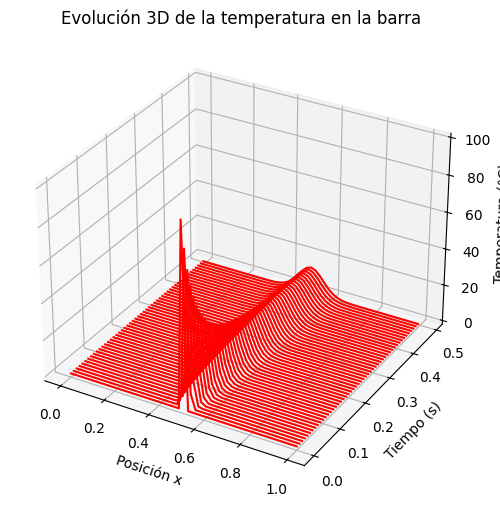

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import re
from mpl_toolkits.mplot3d import Axes3D  # Necesario para 3D

# Ruta al archivo de resultados
ruta_archivo = "../datos/resultados.txt"

# Leer todo el contenido
with open(ruta_archivo, "r") as f:
    contenido = f.read()

# Dividir por pasos
bloques = contenido.strip().split("-------------------------\n")

pasos = []
for bloque in bloques:
    lineas = bloque.strip().split("\n")
    if len(lineas) < 3:
        continue
    # Paso
    paso_match = re.match(r"Paso (\d+):", lineas[0])
    if paso_match:
        paso = int(paso_match.group(1))
    else:
        continue

    # Datos
    x_vals = []
    temp_vals = []
    for linea in lineas[2:]:
        try:
            x, t = map(float, linea.split())
            x_vals.append(x)
            temp_vals.append(t)
        except:
            pass
    pasos.append((paso, np.array(x_vals), np.array(temp_vals)))

# Crear figura 3D
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Parámetro de tiempo
dt = 0.01  # segundos por paso
for paso, x, temp in pasos:
    tiempo = np.full_like(x, paso * dt)  # todos los puntos en este paso tienen el mismo t
    ax.plot(x, tiempo, temp, color='r')

# Etiquetas y título
ax.set_xlabel("Posición x")
ax.set_ylabel("Tiempo (s)")
ax.set_zlabel("Temperatura (°C)")
ax.set_title("Evolución 3D de la temperatura en la barra")

plt.show()


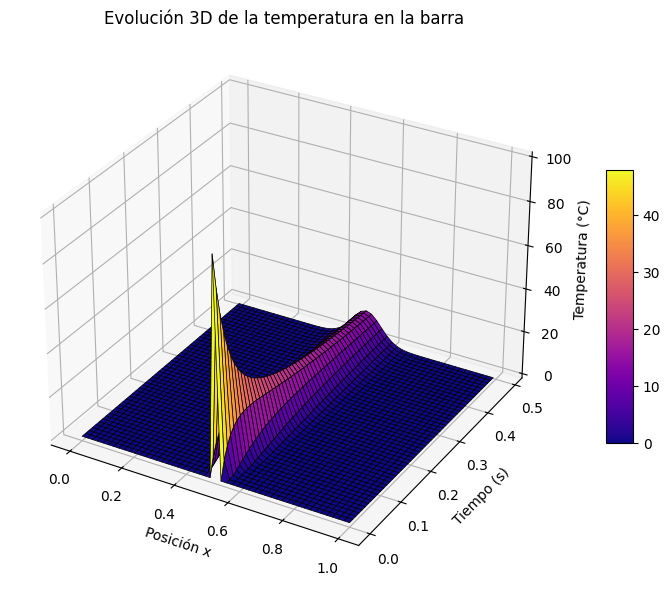

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import re
from mpl_toolkits.mplot3d import Axes3D

# Ruta al archivo de resultados
ruta_archivo = "../datos/resultados.txt"

# Leer contenido
with open(ruta_archivo, "r") as f:
    contenido = f.read()

# Procesar datos
bloques = contenido.strip().split("-------------------------\n")
pasos = []
for bloque in bloques:
    lineas = bloque.strip().split("\n")
    if len(lineas) < 3:
        continue

    paso_match = re.match(r"Paso (\d+):", lineas[0])
    if paso_match:
        paso = int(paso_match.group(1))
    else:
        continue

    x_vals, temp_vals = [], []
    for linea in lineas[2:]:
        try:
            x, t = map(float, linea.split())
            x_vals.append(x)
            temp_vals.append(t)
        except:
            pass

    pasos.append((paso, np.array(x_vals), np.array(temp_vals)))

# Tiempo por paso
dt = 0.01
tiempos = [p * dt for p, _, _ in pasos]
X, T = np.meshgrid(pasos[0][1], tiempos)
Z = np.array([temp for _, _, temp in pasos])

# Gráfica 3D con estilo viridis y malla
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(
    X, T, Z,
    cmap='plasma',    # Colores 
    edgecolor='k',     # Malla negra
    linewidth=0.5,
    antialiased=True
)

ax.set_xlabel("Posición x")
ax.set_ylabel("Tiempo (s)")
ax.set_zlabel("Temperatura (°C)")
ax.set_title("Evolución 3D de la temperatura en la barra")

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.tight_layout()
plt.show()
